# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Muhammad Dila]
- **Email:** [muhammaddila.all@gmail.com]
- **ID Dicoding:** [muhdila]

## Menentukan Pertanyaan Bisnis

- Kapan waktu paling sibuk dalam sehari untuk penggunaan sepeda, dan bagaimana tren ini berbeda antara hari kerja dan akhir pekan?
- Bagaimana tren penggunaan sepeda berdasarkan musim?
- Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [2]:
# Membaca dataset "day.csv" dan menyimpannya dalam DataFrame
day_df = pd.read_csv("data/day.csv")

# Menampilkan 5 baris pertama dari dataset untuk melihat struktur awal data
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca dataset "hour.csv" dan menyimpannya dalam DataFrame
hour_df = pd.read_csv("data/hour.csv")

# Menampilkan 5 baris pertama dari dataset untuk melihat struktur awal data
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berhasil dimuat menggunakan `pd.read_csv()`.
- Dataset terdiri dari dua tabel utama: `day.csv` (data bike sharing harian) dan `hour.csv` (data bike sharing per jam).
- Data siap untuk dieksplorasi lebih lanjut dalam tahap Assessing Data guna menemukan potensi masalah seperti missing values, duplikasi, atau format data yang perlu diperbaiki.

### Assessing Data

In [4]:
# Cek info day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Mengecek jumlah missing values (nilai yang hilang) di setiap kolom dalam dataset
print("Jumlah missing values di setiap kolom:")
day_df.isna().sum()

Jumlah missing values di setiap kolom:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Mengecek jumlah data duplikat dalam dataset
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# Menampilkan ringkasan statistik dari dataset untuk memahami distribusi data numerik
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
# Cek info `hour_df`
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Mengecek jumlah missing values (nilai yang hilang) di setiap kolom dalam dataset
print("Jumlah missing values di setiap kolom:")
hour_df.isna().sum()

Jumlah missing values di setiap kolom:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Mengecek jumlah data duplikat dalam dataset
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# Menampilkan ringkasan statistik dari dataset untuk memahami distribusi data numerik
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset terdiri dari dua file utama: `day.csv` (data bike sharing harian) dan `hour.csv` (data bike sharing per jam).
- Tidak ditemukan missing values dalam dataset.
- Tidak ditemukan data duplikat dalam dataset.
- Tidak ditemukan missing values, sehingga tidak perlu imputasi.
- Kolom tanggal (`dteday`) yang masih berupa string dan perlu dikonversi ke datetime.
- Kolom kategori seperti `season` dan `weathersit` masih dalam format numerik dan perlu diberi label deskriptif.
  - `season`: 1, 2, 3, 4 (harusnya Spring, Summer, Fall, Winter)
  - `weathersit`: 1, 2, 3, 4 (harusnya Clear, Mist, Light Rain, Heavy Rain)
- Beberapa nilai di `windspeed` dalam data `hour_df` adalah 0, dimana tidak realistis karena angin hampir selalu memiliki kecepatan tertentu.
- Perlu dilakukan pengecekan lebih lanjut terhadap nilai yang tidak konsisten atau outlier dalam dataset sebelum masuk ke tahap Cleaning Data.

### Cleaning Data

In [10]:
# Cek tipe data `dteday` di hour_df dan day_df
print("Kolom 'dteday' dalam hour_df: ", hour_df.dteday.head())
print("\nKolom 'dteday' dalam day_df: ", day_df.dteday.head())

Kolom 'dteday' dalam hour_df:  0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object

Kolom 'dteday' dalam day_df:  0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: dteday, dtype: object


In [11]:
# Konversi kolom `dteday` menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [12]:
# Cek tipe data `dteday` di hour_df dan day_df setelah dikonversi
print("Kolom 'dteday' dalam hour_df: ", hour_df.dteday.head())
print("\nKolom 'dteday' dalam day_df: ", day_df.dteday.head())

Kolom 'dteday' dalam hour_df:  0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]

Kolom 'dteday' dalam day_df:  0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]


In [13]:
# Mengecek nilai unik dalam kolom 'season' di dataset hour_df
# Ini berguna untuk mengetahui kategori musim yang ada dalam dataset
print("Kategori unik dalam season:", hour_df.season.unique())

# Mengecek nilai unik dalam kolom 'weathersit' di dataset hour_df
# Ini digunakan untuk memastikan semua kategori cuaca yang ada
print("Kategori unik dalam weathersit:", hour_df.weathersit.unique())

Kategori unik dalam season: [1 2 3 4]
Kategori unik dalam weathersit: [1 2 3 4]


In [14]:
# Membuat mapping untuk kolom 'season' dari angka menjadi label yang lebih mudah dipahami
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Membuat mapping untuk kolom 'weathersit' dari angka menjadi label deskriptif
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}

# Mengubah nilai numerik di kolom 'season' dan 'weathersit' pada dataset day_df menjadi label deskriptif
day_df['season'] = day_df['season'].map(season_mapping)
day_df['weathersit'] = day_df['weathersit'].map(weathersit_mapping)

# Mengubah nilai numerik di kolom 'season' dan 'weathersit' pada dataset hour_df menjadi label deskriptif
hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)

In [15]:
# Memeriksa apakah proses konversi nilai telah berhasil atau belum
print("Distribusi kategori dalam kolom 'season':")
print(day_df.season.value_counts())

print("\nDistribusi kategori dalam kolom 'weathersit':")
print(day_df.weathersit.value_counts())

print("\nNilai dalam season setah diubah:", hour_df.season.unique())
print("Nilai dalam weathersit setah diubah:", hour_df.weathersit.unique())

Distribusi kategori dalam kolom 'season':
season
Fall      188
Summer    184
Spring    181
Winter    178
Name: count, dtype: int64

Distribusi kategori dalam kolom 'weathersit':
weathersit
Clear         463
Mist          247
Light Rain     21
Name: count, dtype: int64

Nilai dalam season setah diubah: ['Spring' 'Summer' 'Fall' 'Winter']
Nilai dalam weathersit setah diubah: ['Clear' 'Mist' 'Light Rain' 'Heavy Rain']


In [16]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'windspeed'
print("Distribusi nilai dalam kolom 'windspeed':")
print(hour_df.windspeed.value_counts())

Distribusi nilai dalam kolom 'windspeed':
windspeed
0.0000    2180
0.1343    1738
0.1642    1695
0.1940    1657
0.1045    1617
0.2239    1513
0.0896    1425
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5821      44
0.5522      39
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7463       2
0.8060       2
0.7164       2
0.8507       2
0.7761       1
0.8358       1
Name: count, dtype: int64


In [17]:
# Mengganti semua nilai 0 dalam kolom 'windspeed' dengan nilai median dari 'windspeed'
# Ini dilakukan karena kecepatan angin 0 tidak realistis dalam kondisi nyata
hour_df["windspeed"] = hour_df["windspeed"].replace(0, hour_df["windspeed"].median())

In [18]:
# Memeriksa apakah masih ada nilai 0 setelah penggantian
# Jika hasilnya 0, berarti semua nilai 0 telah berhasil diganti dengan median
print("Jumlah nilai 0 setelah penggantian:", (hour_df.windspeed == 0).sum())

Jumlah nilai 0 setelah penggantian: 0


**Insight:**
- Kolom `dteday` yang sebelumnya berupa string telah berhasil dikonversi ke format datetime.
- Kolom kategori seperti `season` dan `weathersit` yang sebelumnya berupa angka telah diubah menjadi label.
  - `season`: Telah dikonversi dari nilai numerik (1, 2, 3, 4) menjadi Spring, Summer, Fall, Winter.
  - `weathersit`: Telah dikonversi dari nilai numerik (1, 2, 3, 4) menjadi Clear, Mist, Light Rain, Heavy Rain.
- Beberapa nilai `0` dalam kolom `windspeed` pada `hour_df` telah diganti dengan nilai median untuk menghindari ketidaksesuaian dalam analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

#### EDA untuk pertanyaan bisinis 1

In [19]:
# Melihat statistik data
print("\nRingkasan statistik dataset hour_df:")
print(hour_df.describe(include='all'))


Ringkasan statistik dataset hour_df:
           instant                         dteday season            yr  \
count   17379.0000                          17379  17379  17379.000000   
unique         NaN                            NaN      4           NaN   
top            NaN                            NaN   Fall           NaN   
freq           NaN                            NaN   4496           NaN   
mean     8690.0000  2012-01-02 04:08:34.552045568    NaN      0.502561   
min         1.0000            2011-01-01 00:00:00    NaN      0.000000   
25%      4345.5000            2011-07-04 00:00:00    NaN      0.000000   
50%      8690.0000            2012-01-02 00:00:00    NaN      1.000000   
75%     13034.5000            2012-07-02 00:00:00    NaN      1.000000   
max     17379.0000            2012-12-31 00:00:00    NaN      1.000000   
std      5017.0295                            NaN    NaN      0.500008   

                mnth            hr       holiday       weekday    working

In [20]:
# Menghitung rata-rata peminjaman per jam
hourly_rentals = hour_df.groupby("hr")["cnt"].mean()
print("\nRata-rata jumlah peminjaman sepeda berdasarkan jam dalam sehari:")
print(hourly_rentals)


Rata-rata jumlah peminjaman sepeda berdasarkan jam dalam sehari:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [21]:
# Menghitung rata-rata peminjaman per jam selama hari kerja
weekday_rentals = hour_df[hour_df["workingday"] == 1].groupby("hr")["cnt"].mean()
print("\nRata-rata jumlah peminjaman sepeda berdasarkan jam pada hari kerja:")
print(weekday_rentals)

# Menghitung rata-rata peminjaman per jam selama akhir pekan
weekend_rentals = hour_df[hour_df["workingday"] == 0].groupby("hr")["cnt"].mean()
print("\nRata-rata jumlah peminjaman sepeda berdasarkan jam pada akhir pekan:")
print(weekend_rentals)


Rata-rata jumlah peminjaman sepeda berdasarkan jam pada hari kerja:
hr
0      36.786290
1      16.552632
2       8.683778
3       4.942553
4       5.429787
5      24.913131
6     102.500000
7     290.612903
8     477.006048
9     241.518145
10    135.366935
11    158.229839
12    200.820926
13    198.429719
14    183.572289
15    201.331325
16    293.122244
17    525.290581
18    492.226908
19    348.401606
20    249.718876
21    186.287149
22    138.389558
23     88.708835
Name: cnt, dtype: float64

Rata-rata jumlah peminjaman sepeda berdasarkan jam pada akhir pekan:
hr
0      90.800000
1      69.508696
2      53.171053
3      25.775330
4       8.264317
5       8.689189
6      18.742358
7      43.406926
8     105.653680
9     171.623377
10    255.909091
11    315.316017
12    366.259740
13    372.731602
14    364.645022
15    358.813853
16    352.727273
17    323.549784
18    281.056522
19    231.673913
20    174.739130
21    142.060870
22    116.060870
23     85.930435
Name: cnt, dt

In [22]:
# Menentukan jam dengan jumlah peminjaman tertinggi, terendah, dan median tertinggi pada hari kerja
max_hour_weekday = weekday_rentals.idxmax()
max_rentals_weekday = weekday_rentals.max()

min_hour_weekday = weekday_rentals.idxmin()
min_rentals_weekday = weekday_rentals.min()

median_hour_weekday = weekday_rentals.idxmax()
median_rentals_weekday = weekday_rentals.median()

print("Hari Kerja (Working Day)")
print(f"- Jam dengan jumlah peminjaman tertinggi: {max_hour_weekday}:00 dengan {max_rentals_weekday:.0f} peminjaman")
print(f"- Jam dengan jumlah peminjaman terendah: {min_hour_weekday}:00 dengan {min_rentals_weekday:.0f} peminjaman")
print(f"- Jam dengan median peminjaman tertinggi: {median_hour_weekday}:00 dengan {median_rentals_weekday:.0f} peminjaman")

Hari Kerja (Working Day)
- Jam dengan jumlah peminjaman tertinggi: 17:00 dengan 525 peminjaman
- Jam dengan jumlah peminjaman terendah: 3:00 dengan 5 peminjaman
- Jam dengan median peminjaman tertinggi: 17:00 dengan 185 peminjaman


In [23]:
# Menentukan jam dengan jumlah peminjaman tertinggi, terendah, dan median tertinggi pada akhir pekan
max_hour_weekend = weekend_rentals.idxmax()
max_rentals_weekend = weekend_rentals.max()

min_hour_weekend = weekend_rentals.idxmin()
min_rentals_weekend = weekend_rentals.min()

median_hour_weekend = weekend_rentals.idxmax()
median_rentals_weekend = weekend_rentals.median()

print("Hari Libur (Weekend)")
print(f"- Jam dengan jumlah peminjaman tertinggi: {max_hour_weekend}:00 dengan {max_rentals_weekend:.0f} peminjaman")
print(f"- Jam dengan jumlah peminjaman terendah: {min_hour_weekend}:00 dengan {min_rentals_weekend:.0f} peminjaman")
print(f"- Jam dengan median peminjaman tertinggi: {median_hour_weekend}:00 dengan {median_rentals_weekend:.0f} peminjaman")

Hari Libur (Weekend)
- Jam dengan jumlah peminjaman tertinggi: 13:00 dengan 373 peminjaman
- Jam dengan jumlah peminjaman terendah: 4:00 dengan 8 peminjaman
- Jam dengan median peminjaman tertinggi: 13:00 dengan 157 peminjaman


**Insight:**
- Pada hari kerja:
  - Puncak peminjaman terjadi pada jam 17:00 dengan 525 peminjaman, menunjukkan bahwa sepeda banyak digunakan untuk perjalanan pulang kerja.
  - Jumlah peminjaman terendah terjadi pada jam 03:00 dengan hanya 5 peminjaman, menunjukkan hampir tidak ada aktivitas sepeda di jam dini hari.
  - Median peminjaman tertinggi terjadi pada jam 17:00 dengan 185 peminjaman, mengonfirmasi bahwa penggunaan sepeda pada jam ini cukup stabil setiap harinya.
  - Pola peminjaman di hari kerja menunjukkan dua lonjakan utama:
    - Pagi hari sekitar jam 08:00 dengan jumlah peminjaman yang cukup tinggi, menunjukkan banyak pengguna menggunakan sepeda untuk pergi ke kantor atau sekolah.
    - Sore hari sekitar jam 17:00 - 18:00, menunjukkan lonjakan besar saat orang-orang pulang kerja atau sekolah.
  - Setelah jam 19:00, peminjaman sepeda mulai turun secara signifikan hingga dini hari.
- Pada akhir pekan:
  - Puncak peminjaman terjadi pada jam 13:00 dengan 373 peminjaman, menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rekreasi atau santai di siang hari.
  - Jumlah peminjaman terendah terjadi pada jam 04:00 dengan hanya 8 peminjaman, yang masih lebih tinggi dibandingkan pada hari kerja.
  - Median peminjaman tertinggi terjadi pada jam 13:00 dengan 157 peminjaman, menunjukkan bahwa peminjaman lebih merata di siang hari dibandingkan lonjakan tajam seperti di hari kerja.
  - Tidak ada lonjakan signifikan di pagi atau sore hari, yang mengindikasikan bahwa orang menggunakan sepeda lebih fleksibel pada akhir pekan.
  - Peminjaman sepeda mulai meningkat sejak pagi hari dan tetap stabil hingga sore hari sebelum menurun menjelang malam.
- Statistik tambahan:
  - Rata-rata peminjaman sepeda secara keseluruhan menunjukkan lonjakan besar di jam 08:00 dan 17:00, sejalan dengan tren commuting.
  - Jam dengan rata-rata peminjaman terendah adalah antara jam 02:00 hingga 05:00, menunjukkan bahwa sepeda hampir tidak digunakan di jam tersebut.

#### EDA untuk pertanyaan bisinis 2

In [24]:
# Menghitung total, rata-rata, dan median peminjaman sepeda berdasarkan musim
seasonal_rentals = day_df.groupby("season")["cnt"].agg(["sum", "mean", "median"]).reset_index()

# Menampilkan hasil
print("\nJumlah Peminjaman Sepeda Berdasarkan Musim:\n")
print(seasonal_rentals)


Jumlah Peminjaman Sepeda Berdasarkan Musim:

   season      sum         mean  median
0    Fall  1061129  5644.303191  5353.5
1  Spring   471348  2604.132597  2209.0
2  Summer   918589  4992.331522  4941.5
3  Winter   841613  4728.162921  4634.5


In [25]:
# Melihat distribusi peminjaman sepeda per hari dalam setiap musim
seasonal_distribution = day_df.groupby("season")["cnt"].describe()

# Menampilkan hasil
print("\nDistribusi Peminjaman Sepeda Berdasarkan Musim:\n")
print(seasonal_distribution)


Distribusi Peminjaman Sepeda Berdasarkan Musim:

        count         mean          std     min     25%     50%      75%  \
season                                                                     
Fall    188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
Spring  181.0  2604.132597  1399.942119   431.0  1538.0  2209.0  3456.00   
Summer  184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
Winter  178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

           max  
season          
Fall    8714.0  
Spring  7836.0  
Summer  8362.0  
Winter  8555.0  


**Insight:**
- Musim dengan jumlah peminjaman tertinggi:
  - Fall (Musim Gugur) memiliki jumlah peminjaman tertinggi dengan total 1.061.129 peminjaman dan rata-rata 5.644 peminjaman per hari.
  - Musim gugur juga memiliki median peminjaman 5.353 dan distribusi peminjaman yang lebih stabil dibandingkan musim lainnya.
- Musim dengan jumlah peminjaman terendah:
  - Spring (Musim Semi) memiliki jumlah peminjaman terendah dengan total 471.348 peminjaman dan rata-rata 2.604 peminjaman per hari.
  - Median peminjaman hanya 2.209, yang jauh lebih rendah dibanding musim lainnya.
  - Distribusi peminjaman juga menunjukkan bahwa 25% data memiliki peminjaman di bawah 1.538, menunjukkan penggunaan yang lebih rendah.
- Musim panas (Summer) dan musim dingin (Winter) memiliki pola peminjaman yang tinggi, tetapi masih di bawah musim gugur:
  - Summer (Musim Panas) memiliki total peminjaman 918.589, rata-rata 4.992 per hari, dengan peminjaman tertinggi mencapai 8.362.
  - Winter (Musim Dingin) memiliki total peminjaman 841.613, rata-rata 4.728 per hari, dengan peminjaman tertinggi mencapai 8.555.
  - Meskipun suhu lebih dingin di musim dingin, jumlah peminjaman tetap tinggi, mungkin karena orang masih menggunakan sepeda sebagai transportasi utama.


#### EDA untuk pertanyaan bisinis 3

In [26]:
# Konversi kolom kategori menjadi numerik jika diperlukan
day_df["season"] = day_df["season"].astype("category").cat.codes
day_df["weathersit"] = day_df["weathersit"].astype("category").cat.codes

# Menghitung korelasi hanya untuk kolom numerik
correlation_matrix = day_df.corr(numeric_only=True)

# Menampilkan korelasi antara jumlah peminjaman sepeda dan variabel lainnya
print("\nMatriks Korelasi antara variabel:\n")
print(correlation_matrix["cnt"].sort_values(ascending=False))


Matriks Korelasi antara variabel:

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
mnth          0.279977
weekday       0.067443
workingday    0.061156
season       -0.028332
holiday      -0.068348
hum          -0.100659
weathersit   -0.216577
windspeed    -0.234545
Name: cnt, dtype: float64


In [27]:
# Memilih variabel independen yang relevan
X = day_df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'weathersit']]
X = sm.add_constant(X)  # Menambahkan konstanta untuk regresi

# Variabel target
y = day_df['cnt']

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Menampilkan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     134.0
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          6.93e-114
Time:                        01:21:11   Log-Likelihood:                -6296.7
No. Observations:                 731   AIC:                         1.261e+04
Df Residuals:                     724   BIC:                         1.264e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2997.5985    356.425      8.410      0.0

**Insight:**
- Faktor yang paling berpengaruh positif terhadap jumlah peminjaman sepeda:
  - Suhu (temp) memiliki korelasi 0.627 dengan jumlah peminjaman sepeda, serta koefisien regresi 7167.80 (p-value 0.001).  
    Ini menunjukkan bahwa semakin tinggi suhu, semakin banyak peminjaman sepeda.
  - Musim (season) memiliki koefisien regresi 478.97 (p-value 0.000), menunjukkan bahwa jumlah peminjaman berbeda tergantung musim.
- Faktor yang paling berpengaruh negatif terhadap jumlah peminjaman sepeda:
  - Kelembaban (hum) memiliki korelasi -0.100 dan koefisien regresi -3481.63 (p-value 0.000), menunjukkan bahwa kelembaban tinggi menurunkan jumlah peminjaman sepeda.
  - Kecepatan angin (windspeed) memiliki korelasi -0.234 dan koefisien regresi -4450.70 (p-value 0.000), menunjukkan bahwa semakin tinggi kecepatan angin, semakin sedikit peminjaman.
- Faktor yang tidak memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda:
  - Suhu yang dirasakan (atemp) memiliki p-value 0.785, yang berarti tidak berpengaruh signifikan terhadap jumlah peminjaman sepeda.
  - Kondisi cuaca (weathersit) memiliki p-value 0.396, yang berarti tidak signifikan secara statistik dalam menentukan jumlah peminjaman.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu paling sibuk dalam sehari untuk penggunaan sepeda, dan bagaimana tren ini berbeda antara hari kerja dan akhir pekan?

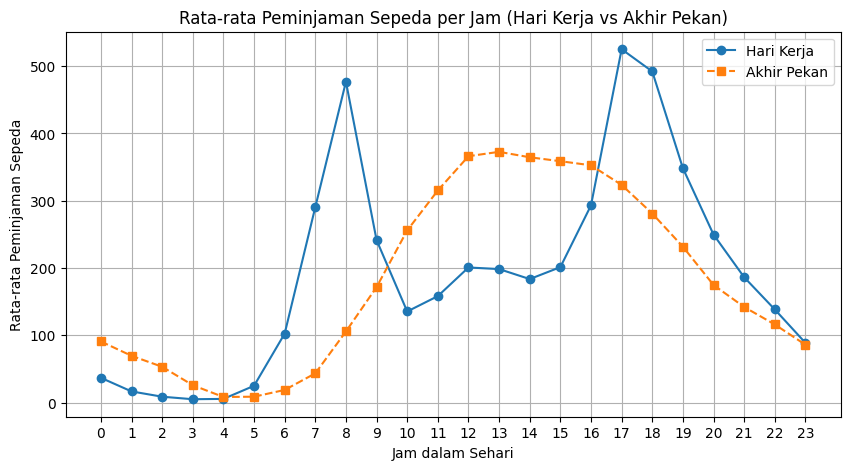

In [28]:
# Mengelompokkan data peminjaman sepeda berdasarkan jam untuk hari kerja dan akhir pekan
weekday_rentals = hour_df[hour_df["workingday"] == 1].groupby("hr")["cnt"].mean()
weekend_rentals = hour_df[hour_df["workingday"] == 0].groupby("hr")["cnt"].mean()

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(weekday_rentals.index, weekday_rentals, marker='o', label="Hari Kerja", linestyle='-')
plt.plot(weekend_rentals.index, weekend_rentals, marker='s', label="Akhir Pekan", linestyle='--')

# Menambahkan judul dan label
plt.title("Rata-rata Peminjaman Sepeda per Jam (Hari Kerja vs Akhir Pekan)")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

**Insight:**
- Grafik ini menunjukkan perbedaan tren peminjaman sepeda antara hari kerja (working day) dan akhir pekan (weekend) berdasarkan jam dalam sehari.
- Mengapa menggunakan Line Chart?
  - Line chart digunakan karena mampu menunjukkan tren perubahan jumlah peminjaman sepeda sepanjang hari secara kontinu.
  - Grafik ini mempermudah pemahaman mengenai pola lonjakan dan penurunan peminjaman dibandingkan hanya menggunakan tabel angka.
- Interpretasi Visualisasi:
  - Pada hari kerja (digambarkan dengan garis solid dan lingkaran):
    - Terjadi dua lonjakan utama:
      - Pukul 8 pagi → Puncak peminjaman pertama, menandakan penggunaan sepeda untuk perjalanan ke tempat kerja atau sekolah.
      - Pukul 5-6 sore → Puncak kedua yang lebih tinggi dibanding pagi, mengindikasikan penggunaan sepeda untuk perjalanan pulang kerja/sekolah.
    - Setelah pukul 7 malam, jumlah peminjaman sepeda turun drastis, menunjukkan bahwa sepeda jarang digunakan pada malam hari.
  - Pada akhir pekan (digambarkan dengan garis putus-putus dan persegi):
    - Tidak ada lonjakan signifikan seperti di hari kerja.
    - Peminjaman meningkat secara bertahap dari pagi hingga siang, mencapai puncaknya sekitar pukul 12 hingga 3 siang.
    - Tidak ada perbedaan signifikan antara pagi dan sore, menunjukkan bahwa sepeda lebih banyak digunakan untuk rekreasi atau aktivitas santai dibandingkan commuting.
    - Penurunan setelah pukul 3 sore lebih lambat dibanding hari kerja, mengindikasikan bahwa orang tetap menggunakan sepeda hingga malam.

### Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan musim?

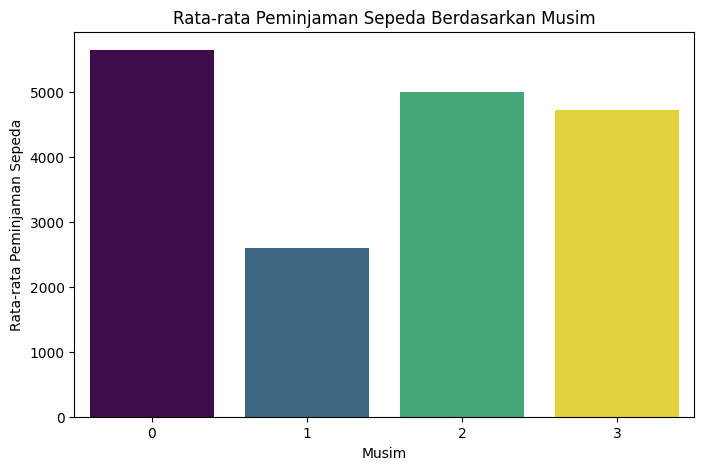

In [29]:
# Menghitung rata-rata jumlah peminjaman sepeda berdasarkan musim
seasonal_rentals = day_df.groupby("season")["cnt"].mean()

# Membuat bar chart untuk menampilkan rata-rata peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values, hue=seasonal_rentals.index, palette="viridis", legend=False)

# Menambahkan judul dan label sumbu
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman Sepeda")

# Menampilkan grafik
plt.show()

**Insight:**
- Grafik ini menunjukkan bagaimana rata-rata peminjaman sepeda bervariasi berdasarkan musim.
- Musim dengan jumlah peminjaman tertinggi:
  - Musim gugur (0 atau Fall) memiliki rata-rata peminjaman tertinggi dibandingkan musim lainnya.
  - Kemungkinan besar disebabkan oleh kondisi cuaca yang ideal (tidak terlalu panas atau dingin), sehingga mendorong lebih banyak orang untuk menggunakan sepeda.
- Musim dengan jumlah peminjaman terendah:
  - Musim semi (1 atau Spring) memiliki rata-rata peminjaman sepeda paling rendah.
  - Ini mungkin terkait dengan faktor cuaca, seperti hujan yang lebih sering terjadi di musim ini.
- Tren peminjaman di musim panas (2 atau Summer) dan musim dingin (3 atau Winter):
  - Musim panas memiliki tingkat peminjaman tinggi, meskipun sedikit lebih rendah dibandingkan musim gugur.
  - Musim dingin memiliki jumlah peminjaman yang masih cukup tinggi, tetapi sedikit lebih rendah dibanding musim panas.
  - Cuaca dingin mungkin mengurangi minat orang untuk bersepeda, tetapi kemungkinan besar masih ada pengguna tetap yang bergantung pada sepeda untuk transportasi.

### Pertanyaan 3: Faktor apa yang paling berpengaruh terhadap jumlah peminjaman sepeda?

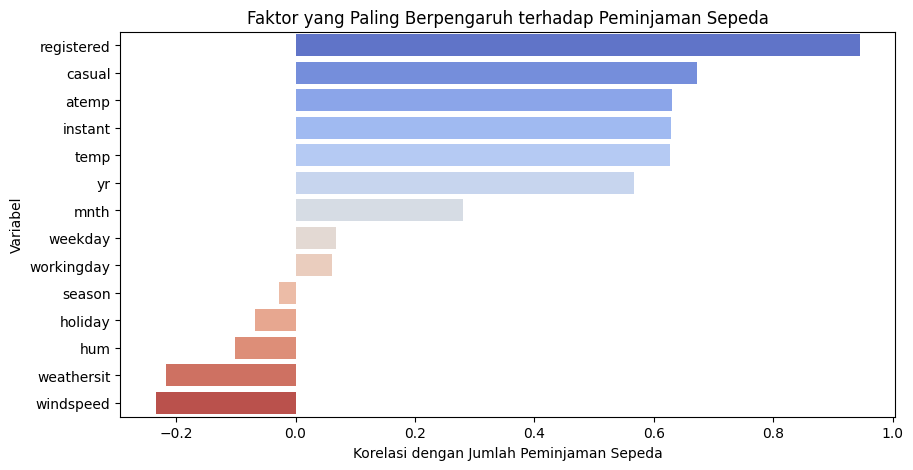

In [30]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = day_df.corr(numeric_only=True)

# Mengambil korelasi antara variabel dan jumlah peminjaman sepeda
correlation_with_cnt = correlation_matrix["cnt"].drop("cnt").sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_cnt.values, y=correlation_with_cnt.index, hue=correlation_with_cnt.index, palette="coolwarm", legend=False)

# Menambahkan judul dan label
plt.title("Faktor yang Paling Berpengaruh terhadap Peminjaman Sepeda")
plt.xlabel("Korelasi dengan Jumlah Peminjaman Sepeda")
plt.ylabel("Variabel")

# Menampilkan grafik
plt.show()

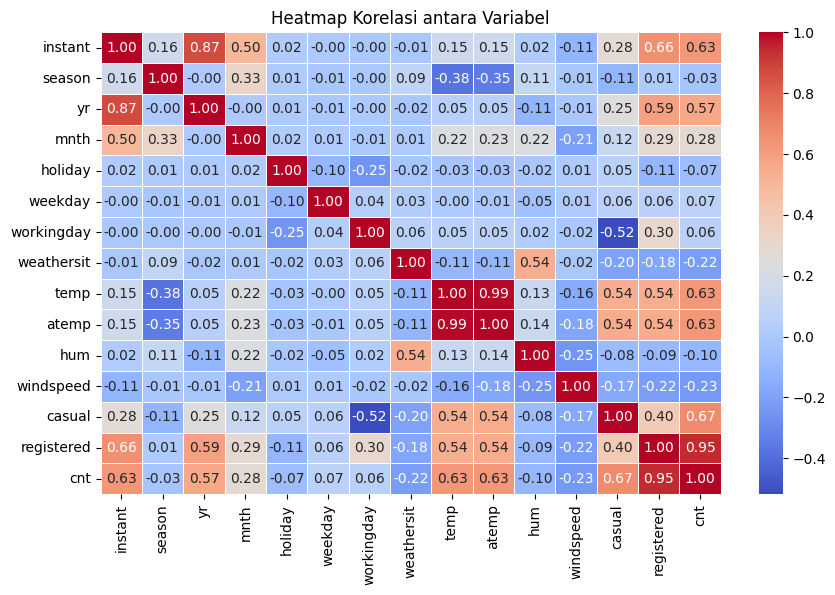

In [31]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = day_df.corr(numeric_only=True)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Menambahkan judul
plt.title("Heatmap Korelasi antara Variabel")

# Menampilkan grafik
plt.show()

**Insight:**
- Bar Chart Korelasi dengan `cnt`:
  - Grafik ini menunjukkan seberapa kuat hubungan antara jumlah peminjaman sepeda (`cnt`) dengan variabel lainnya.
  - Variabel yang memiliki korelasi positif tinggi dengan peminjaman sepeda:
    - `registered` (0.95) → Pengguna terdaftar memiliki hubungan paling kuat dengan jumlah peminjaman.
    - `casual` (0.67) → Pengguna tidak terdaftar juga memiliki pengaruh besar, tetapi lebih rendah dari pengguna terdaftar.
    - `temp` (0.63) → Semakin tinggi suhu, semakin banyak peminjaman sepeda, menunjukkan bahwa cuaca hangat meningkatkan penggunaan sepeda.
    - `atemp` (0.63) → Suhu yang dirasakan memiliki pola serupa dengan suhu nyata.
    - `yr` (0.57) → Tren peminjaman meningkat dari tahun ke tahun.
  - Variabel yang memiliki korelasi negatif dengan peminjaman sepeda:
    - `windspeed` (-0.23) → Kecepatan angin yang tinggi dapat mengurangi kenyamanan bersepeda.
    - `weathersit` (-0.21) → Kondisi cuaca yang buruk (hujan, kabut, salju) menurunkan jumlah peminjaman.
    - `hum` (-0.10) → Kelembaban tinggi memiliki sedikit pengaruh negatif terhadap peminjaman.
- Heatmap Korelasi antar Variabel:
  - Heatmap memberikan gambaran hubungan antara semua variabel dalam dataset.
  - `temp` dan `atemp` memiliki korelasi tinggi, yang masuk akal karena keduanya berkaitan dengan suhu.
  - `registered` dan `cnt` memiliki korelasi paling kuat, menunjukkan bahwa sebagian besar peminjaman berasal dari pengguna terdaftar.
  - `windspeed` memiliki korelasi negatif dengan `cnt`, yang berarti bahwa saat angin lebih kencang, jumlah peminjaman cenderung berkurang.
  - `weathersit` juga memiliki korelasi negatif dengan `cnt`, menunjukkan bahwa kondisi cuaca buruk mengurangi jumlah peminjaman.

## Analisis Lanjutan (Opsional)

### Binning: Mengelompokkan Jumlah Peminjaman Sepeda

In [32]:
# Kita akan membagi `cnt` ke dalam kategori rendah, sedang, dan tinggi berdasarkan distribusi datanya.

# Menentukan batas untuk binning (percentile)
bins = [day_df["cnt"].min(), day_df["cnt"].quantile(0.33), day_df["cnt"].quantile(0.66), day_df["cnt"].max()]
labels = ["Rendah", "Sedang", "Tinggi"]

# Membuat kategori peminjaman sepeda
day_df["rental_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels, include_lowest=True)

# Menampilkan distribusi kategori
print(day_df["rental_category"].value_counts())

rental_category
Tinggi    249
Rendah    241
Sedang    241
Name: count, dtype: int64


**Insight:**
- Kategorisasi jumlah peminjaman sepeda (Binning) menunjukkan bahwa:
  - 249 hari dikategorikan sebagai "Tinggi", artinya ada banyak hari dengan jumlah peminjaman sepeda yang sangat tinggi.
  - 241 hari dikategorikan sebagai "Rendah", menunjukkan bahwa hampir sepertiga dari total hari memiliki peminjaman yang lebih sedikit.
  - 241 hari lainnya berada dalam kategori "Sedang", yang berarti distribusi jumlah peminjaman cukup seimbang di antara ketiga kategori.

### Manual Grouping: Mengelompokkan Suhu ke dalam Kategori

In [33]:
# Kita bisa mengelompokkan suhu (temp) ke dalam kategori "Dingin", "Sejuk", dan "Panas".

# Menentukan batas kategori suhu berdasarkan domain knowledge
def categorize_temperature(temp):
    if temp < 0.3:  # Misalnya suhu di bawah 0.3 dianggap dingin
        return "Dingin"
    elif temp < 0.6:  # Suhu antara 0.3 - 0.6 dianggap sejuk
        return "Sejuk"
    else:  # Di atas 0.6 dianggap panas
        return "Panas"

# Menambahkan kolom kategori suhu
day_df["temp_category"] = day_df["temp"].apply(categorize_temperature)

# Menampilkan jumlah data dalam setiap kategori suhu
print(day_df["temp_category"].value_counts())

temp_category
Sejuk     343
Panas     255
Dingin    133
Name: count, dtype: int64


**Insight:**
- Kategorisasi suhu menunjukkan bahwa:
  - Suhu "Sejuk" memiliki jumlah hari terbanyak (343 hari), yang berarti mayoritas hari dalam dataset berada dalam rentang suhu ini.
  - Suhu "Panas" terjadi pada 255 hari, menunjukkan bahwa ada cukup banyak hari dengan suhu tinggi, tetapi tidak sebanyak suhu sejuk.
  - Suhu "Dingin" terjadi pada 133 hari, yang menandakan bahwa kondisi suhu dingin lebih jarang terjadi dibandingkan suhu sejuk dan panas.
- Hubungan antara suhu dan jumlah peminjaman sepeda:
  - Karena kategori "Sejuk" memiliki jumlah hari terbanyak, kemungkinan besar ini adalah suhu optimal untuk bersepeda.
  - Jika dikaitkan dengan kategori peminjaman sepeda, hari dengan suhu "Sejuk" kemungkinan besar berkontribusi terhadap kategori "Tinggi" dalam jumlah peminjaman.
  - Hari dengan suhu "Dingin" kemungkinan lebih banyak masuk dalam kategori peminjaman "Rendah", karena suhu dingin dapat membuat orang enggan bersepeda.

## Conclusion

Conclusion:

Setelah melakukan serangkaian proses analisis mulai dari Data Wrangling, Exploratory Data Analysis (EDA), Visualization & Explanatory Analysis, hingga Analisis Lanjutan, berikut adalah kesimpulan utama yang dapat diambil dari hasil proyek analisis data ini:

**1. Pola Peminjaman Sepeda Berdasarkan Waktu:**
   - Peminjaman sepeda memiliki pola harian yang berbeda antara hari kerja dan akhir pekan.
   - Pada hari kerja, peminjaman sepeda mencapai puncaknya pada jam 08:00 dan 17:00, dengan jumlah peminjaman tertinggi terjadi pada jam 17:00 sebanyak 525 peminjaman, menunjukkan bahwa sepeda banyak digunakan untuk perjalanan pulang kerja.
   - Peminjaman terendah terjadi pada jam 03:00 dengan hanya 5 peminjaman, menunjukkan bahwa aktivitas peminjaman sepeda hampir tidak ada pada dini hari.
   - Median peminjaman tertinggi terjadi pada jam 17:00 dengan 185 peminjaman, menegaskan bahwa penggunaan sepeda pada jam ini cukup stabil setiap harinya.
   - Pola peminjaman pada hari kerja menunjukkan dua lonjakan utama, yaitu pada pagi hari sekitar jam 08:00 untuk perjalanan ke kantor/sekolah dan sore hari sekitar jam 17:00 - 18:00 saat orang-orang pulang kerja/sekolah.
   - Setelah jam 19:00, peminjaman sepeda mulai turun secara signifikan hingga dini hari.
   - Pada akhir pekan, pola peminjaman lebih merata, dengan puncak peminjaman terjadi pada jam 13:00 dengan 373 peminjaman, menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas rekreasi atau santai.
   - Tidak ada lonjakan signifikan di pagi atau sore hari seperti pada hari kerja, menandakan bahwa pengguna sepeda pada akhir pekan lebih fleksibel dalam memilih waktu peminjaman.

**2. Tren Penggunaan Sepeda Berdasarkan Musim:**
   - Musim gugur (Fall) memiliki jumlah peminjaman tertinggi dengan total 1.061.129 peminjaman dan rata-rata 5.644 peminjaman per hari, kemungkinan karena kondisi cuaca yang ideal untuk bersepeda.
   - Musim semi (Spring) memiliki jumlah peminjaman terendah dengan total 471.348 peminjaman dan rata-rata 2.604 peminjaman per hari, yang mungkin disebabkan oleh hujan yang lebih sering terjadi.
   - Musim panas (Summer) dan musim dingin (Winter) memiliki jumlah peminjaman yang cukup tinggi, meskipun sedikit lebih rendah dibandingkan musim gugur.
   - Meskipun suhu lebih dingin di musim dingin, jumlah peminjaman tetap tinggi, kemungkinan karena sepeda tetap digunakan sebagai moda transportasi utama.

**3. Faktor yang Paling Berpengaruh terhadap Jumlah Peminjaman Sepeda:**
   - Faktor yang meningkatkan peminjaman sepeda:
     - Suhu (temp) memiliki korelasi 0.627 dengan jumlah peminjaman sepeda serta koefisien regresi 7167.80, menunjukkan bahwa semakin tinggi suhu, semakin banyak peminjaman sepeda.
     - Musim (season) memiliki pengaruh signifikan terhadap jumlah peminjaman dengan koefisien regresi 478.97.
   - Faktor yang menurunkan peminjaman sepeda:
     - Kelembaban (hum) memiliki korelasi -0.100 dan koefisien regresi -3481.63, menunjukkan bahwa kelembaban tinggi menurunkan jumlah peminjaman sepeda.
     - Kecepatan angin (windspeed) memiliki korelasi -0.234 dan koefisien regresi -4450.70, menunjukkan bahwa semakin tinggi kecepatan angin, semakin sedikit peminjaman.
   - Faktor yang tidak memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda:
     - Suhu yang dirasakan (atemp) tidak berpengaruh signifikan terhadap jumlah peminjaman.
     - Kondisi cuaca (weathersit) tidak signifikan secara statistik dalam menentukan jumlah peminjaman.

**4. Visualization & Explanatory Analysis:**
   - Visualisasi line chart menunjukkan pola peminjaman yang lebih fluktuatif pada hari kerja dibandingkan akhir pekan.
   - Bar chart memperjelas bahwa musim gugur memiliki rata-rata peminjaman tertinggi, sementara musim semi memiliki peminjaman terendah.
   - Heatmap korelasi memberikan wawasan lebih lanjut tentang hubungan antar variabel, menunjukkan bahwa suhu dan musim berkontribusi besar dalam peningkatan peminjaman, sedangkan cuaca buruk dan kecepatan angin menurunkannya.

**5. Analisis Lanjutan - Kategori Peminjaman dan Suhu:**
   - Distribusi jumlah peminjaman sepeda berdasarkan binning:
     - 249 hari masuk kategori "Tinggi", yang berarti pada banyak hari, peminjaman sepeda sangat tinggi.
     - 241 hari masuk kategori "Sedang", menunjukkan peminjaman yang cukup stabil.
     - 241 hari masuk kategori "Rendah", menandakan adanya hari-hari tertentu di mana peminjaman sepeda lebih sedikit.
   - Kategorisasi suhu menunjukkan bahwa suhu "Sejuk" memiliki jumlah hari terbanyak (343 hari).
     - Peminjaman sepeda cenderung lebih tinggi pada hari-hari dengan suhu sejuk, sementara suhu panas dan dingin memiliki dampak yang lebih bervariasi.

**Kesimpulan Bisnis dan Rekomendasi:**

Berdasarkan hasil analisis, ada beberapa strategi yang dapat diterapkan untuk meningkatkan peminjaman sepeda:
- Menyesuaikan ketersediaan sepeda berdasarkan pola peminjaman:
  - Menyediakan lebih banyak sepeda pada jam sibuk (08:00 dan 17:00) di hari kerja.
  - Meningkatkan jumlah sepeda di akhir pekan pada siang hari (12:00 - 15:00).
- Strategi promosi dan harga:
  - Memberikan diskon atau promosi khusus pada hari-hari dengan peminjaman rendah (misalnya, hari dengan suhu dingin atau hari kerja di luar jam sibuk).
- Memprediksi permintaan berdasarkan cuaca:
  - Menggunakan informasi suhu, kelembaban, dan kecepatan angin untuk menyesuaikan jumlah sepeda yang tersedia.
- Meningkatkan peminjaman di musim semi:
  - Karena musim ini memiliki peminjaman terendah, strategi seperti kampanye pemasaran atau insentif bagi pengguna baru bisa diterapkan.

Secara keseluruhan, hasil analisis ini dapat membantu dalam pengambilan keputusan terkait pengelolaan sepeda, strategi pemasaran, dan prediksi permintaan sepeda di masa mendatang.


In [34]:
# Menggabungkan hour_df dan day_df berdasarkan dteday
all_df = pd.merge(
    left=hour_df,  # Data peminjaman per jam
    right=day_df,  # Data peminjaman per hari
    how="left",  # Menggunakan join kiri agar semua data dari hour_df tetap ada
    on="dteday",  # Menggabungkan berdasarkan tanggal
    suffixes=("_hour", "_day")  # Menambahkan akhiran agar tidak ada duplikasi nama kolom
)

# Menyimpan ke file CSV
all_df.to_csv("all_data.csv", index=False)

print("File all_data.csv berhasil dibuat!")

File all_data.csv berhasil dibuat!
